In [1]:
#!pip install spectral

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

#from spectral import imshow, view_cube
#import spectral.io.envi as envi


## Inforamções aleatórias

usar so antigeno, controle e interferencia (outras coisas que nao é o antigeno)

coluna 1 e 2: coordenada da imagem
coluna 3: comprimento de onda
coluna 4: intensidade do elemento

plotar intensidade x comprimento: espectro


para cada pixel tem um array que é o espectro. E cada espectro tem 1014 comprimento de ondas.

se parar no comprimento de onda e olha os dados (os pixels) vemos a imagem


cada espectro tem 1014 linhas. com 441 espectros (21 linhas x 21 colunas)


olhar para comprimento de onda de onde esta o pico.

espectro medio

o objeto de dado é o cubo. dentro daquele cubo temos que saber quais atributos são importantes

ver imagem basta fixar os espectros e percorrer as coordenadas 

1079, cm^-1, pico de tudo

### Lendo os arquivos do diretório

In [2]:
antigenPath = 'dados/sers/antigen'
controlPath = 'dados/sers/control'
interferingPath = 'dados/sers/interfering'


# def create_dataframe_from_files2(file_paths):
#     data_frames = []
#     for file_path in file_paths:
#         # Read the data from the CSV file
#         data = pd.read_csv(file_path, delimiter='\t', header=None)

#         # Get the x and y coordinates for this file
#         x_coords = data.iloc[:, 0].unique()
#         y_coords = data.iloc[:, 1].unique()

#         # Create a new DataFrame with the fixed x and y coordinates
#         new_data = pd.DataFrame(columns=['x', 'y', 'signal_length', 'signal_strength'])
#         for x in x_coords:
#             for y in y_coords:
#                 # Get the signal lengths and strengths for this (x, y) coordinate
#                 signal_data = data[(data.iloc[:, 0] == x) & (data.iloc[:, 1] == y)]
#                 signal_length = signal_data.iloc[:, 2].values
#                 signal_strength = signal_data.iloc[:, 3].values

#                 # Add a new row to the DataFrame with the fixed (x, y) coordinate and the signal data as arrays
#                 new_row = pd.DataFrame({'x': [x], 'y': [y], 'signal_length': [signal_length], 'signal_strength': [signal_strength]})
#                 new_data = pd.concat([new_data, new_row])

#         data_frames.append(new_data)

#     # Concatenate all the DataFrames for each file into a single DataFrame
#     combined_data = pd.concat(data_frames)

#     return combined_data

def concatenate_arrays(array1, array2, array3):
    new_array = []
    for i in range(len(array1)):
        new_element = str(array1[i]) + '_' + str(array2[i]) + '_' + str(array3[i])
        new_array.append(new_element)
    return new_array


def read_data_file(file_path):
    data = pd.read_csv(file_path, delimiter='\t', header=None)
    coordX = data.iloc[:,0].values
    coordY = data.iloc[:,1].values
    data = data.iloc[:, 2:].set_index(2).transpose().rename_axis('', axis=1)
    data = convert_column_names_to_string(data)
    columns = data.columns.values
    data.columns = concatenate_arrays(columns,coordX,coordY)
    return data

def convert_column_names_to_string(df):
    df.columns = df.columns.astype(str)
    return df

def create_dataframe_from_files(file_path_list):
    data = pd.DataFrame()
    for file_path in file_path_list:
        current_data = read_data_file(file_path)
        data = pd.concat([data, current_data], axis=0, ignore_index=True)
    data.index.name = None
    return data

    
def create_datasets(antigen_path, control_path, interfering_path):
    antigen_files = next(os.walk(antigen_path), (None, None, []))[2]
    control_files = next(os.walk(control_path), (None, None, []))[2]
    interfering_files = next(os.walk(interfering_path), (None, None, []))[2]

    antigen_data = create_dataframe_from_files([os.path.join(antigen_path, file_name) for file_name in antigen_files])
    control_data = create_dataframe_from_files([os.path.join(control_path, file_name) for file_name in control_files])
    interfering_data = create_dataframe_from_files([os.path.join(interfering_path, file_name) for file_name in interfering_files])

    return antigen_data, control_data, interfering_data



def merge_datasets(antigen_data, control_data, interfering_data):
    # Add a new column with values 0 for control, 1 for antigen, and 2 for interfering
    antigen_data['target'] = 1
    control_data['target'] = 0
    interfering_data['target'] = 2

    # Concatenate the three dataframes vertically
    merged_data = pd.concat([antigen_data, control_data, interfering_data], axis=0)
    merged_data = merged_data.reset_index(drop = True)

    return merged_data

antigen_data, control_data, interfering_data = create_datasets(antigenPath, controlPath, interferingPath)
raw_data = merge_datasets(antigen_data, control_data, interfering_data)
raw_data

,1611.19_-10_-10,1610.19_-10_-10,1609.18_-10_-10,1608.18_-10_-10,1607.17_-10_-10,1606.17_-10_-10,1605.16_-10_-10,1604.16_-10_-10,1603.15_-10_-10,1602.14_-10_-10,...,481.162_10_10,479.898_10_10,478.634_10_10,477.37_10_10,476.105_10_10,474.84_10_10,473.574_10_10,472.308_10_10,471.042_10_10,target
0,1971.64,2113.54,2145.43,2147.46,2134.56,2268.41,2310.19,2478.76,2607.48,2793.30,...,817.122,846.591,868.135,877.807,859.802,853.662,849.501,876.943,847.108,1
1,1951.72,1964.17,2033.43,2067.83,2040.02,2106.73,2297.76,2369.36,2480.71,2728.69,...,807.230,844.613,787.057,818.496,838.060,818.093,813.940,780.163,805.641,1
2,2200.67,2392.35,2232.55,2363.95,2457.97,2529.57,2703.10,2816.88,2980.33,3178.50,...,1109.940,1034.500,1073.800,1103.190,1116.750,1094.740,1088.550,1098.150,1082.090,1
3,2720.96,2661.21,2802.51,2856.64,2938.12,2997.18,3091.03,3289.26,3581.86,3774.93,...,1167.320,1141.320,1178.610,1138.780,1148.380,1157.980,1155.720,1189.010,1176.870,1
4,2444.63,2509.36,2610.86,2587.90,2731.63,2833.02,2859.77,3085.39,3325.84,3461.80,...,1115.880,1109.670,1162.790,1136.800,1183.960,1120.430,1106.330,1147.530,1176.870,1
5,2509.36,2613.91,2670.59,2694.90,2716.71,2775.82,3033.84,3120.20,3380.52,3625.82,...,1143.580,1072.080,1101.480,1105.170,1096.990,1061.150,1110.280,1098.150,1101.830,1
6,2691.09,2676.15,2747.75,2809.36,2972.95,2900.18,3158.18,3254.46,3440.18,3842.03,...,1121.810,1149.230,1097.530,1150.640,1055.480,1118.460,1169.540,1111.980,1082.090,1
7,2561.64,2648.77,2710.42,2774.53,2754.02,2892.72,3066.17,3159.98,3286.07,3523.93,...,914.069,927.690,972.944,931.187,907.239,867.494,887.037,926.320,894.499,1
8,2031.38,2048.81,2080.72,2139.99,2179.34,2206.23,2325.11,2483.73,2592.56,2731.17,...,789.423,850.547,796.944,836.289,812.364,816.117,813.940,821.640,817.489,1
9,2051.30,2011.47,2132.99,2159.90,2194.26,2176.38,2362.41,2473.78,2637.31,2820.64,...,868.563,824.833,808.810,860.013,863.755,847.734,869.256,831.516,827.362,1


In [3]:
def countValues(array):
    return pd.DataFrame(array.value_counts())

targets = raw_data.iloc[:,-1]
countValues(targets)

,target
0,20
1,16
2,10


In [4]:
columns = raw_data.columns
countValues(columns)

,0
1611.19_-10_-10,1
473.574_3_10,1
1603.15_4_-10,1
1604.16_4_-10,1
1605.16_4_-10,1
...,...
473.574_-4_10,1
474.84_-4_10,1
476.105_-4_10,1
477.37_-4_10,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Columns: 447175 entries, 1611.19_-10_-10 to target
dtypes: float64(447174), int64(1)
memory usage: 156.9 MB


In [10]:
## 21 x 21 x 1014 = 441 (number of waves) x 1014 (lenght of a wave)
def removeSamples(dataframe, target_value):
    filtered_dataframe = dataframe[dataframe['target'] != target_value]
    return filtered_dataframe

def getWave(df, kWave):
    wavelength = 1014
    multiplier = wavelength * kWave
    wave = df.iloc[:, multiplier:multiplier + wavelength]
    wave['target'] = df['target']
    waveWithoutInterfering = removeSamples(wave, 2)

    return wave, waveWithoutInterfering

waveWithInterfering, wave = getWave(raw_data, 0) ## 0 to 441
len(wave), len(waveWithInterfering)

(46, 36)

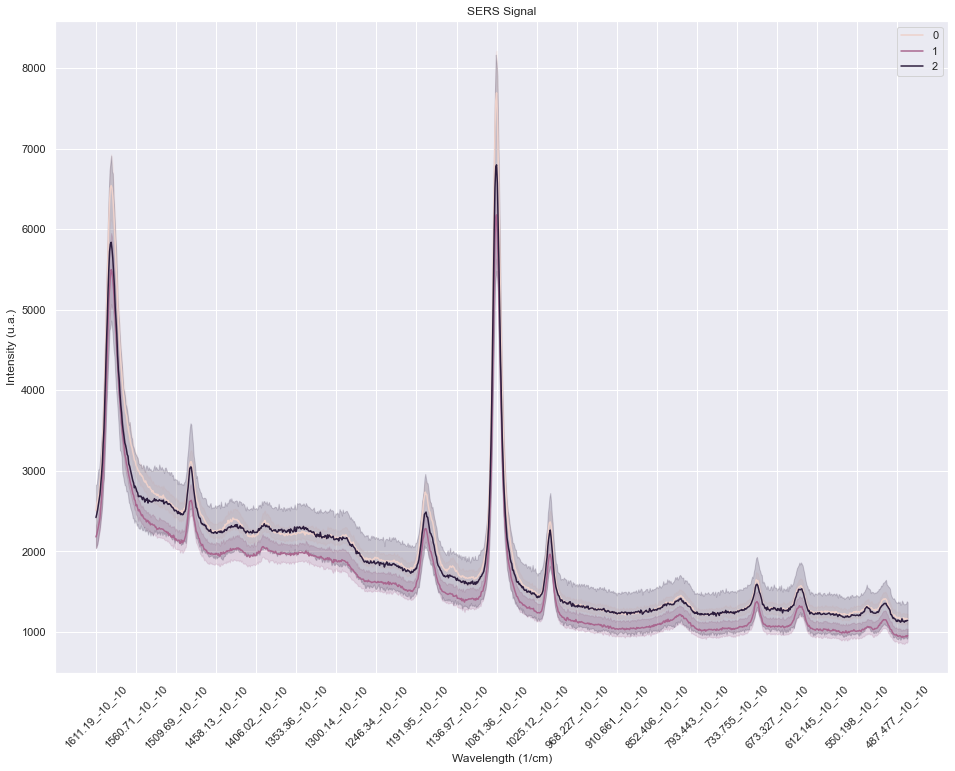

In [11]:

def plotParallelCoordinates(df, title, xlabel, ylabel, target = 'target', colors = ['red', 'blue', 'green']):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
    new_df = df.copy()
    pd.plotting.parallel_coordinates(frame = new_df, class_column = target, ax = ax, color = colors)
    ax.set(title = title,
           xlabel = xlabel,
           ylabel = ylabel)
    plt.xticks(rotation = 45, fontsize = 10)
    #ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
    plt.show()



def plotSersSignal(dataframe):
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(16,12))

    target_column = "target"
    columns = dataframe.columns.to_list()
    columns.remove(target_column)

    dataframe_melted = dataframe.melt(id_vars=target_column, value_vars=columns, var_name="Wavelength (1/cm)", value_name="Intensity (u.a.)")
    sns.lineplot(data=dataframe_melted, x="Wavelength (1/cm)", y="Intensity (u.a.)", hue=target_column, markers=True)

    plt.xlabel('Wavelength (1/cm)')
    plt.ylabel('Intensity (u.a.)')
    plt.title('SERS Signal')
    plt.legend()
    plt.xticks(range(0, len(columns), 50), rotation=45)  # Set x-axis ticks to go from 50 to 50 values
    #plt.tight_layout()
    plt.show()

#plot_sers_signal(sample_wave)
plotSersSignal(wave)

1 arquivo txt é igual a 1 mapa (um **dado**)

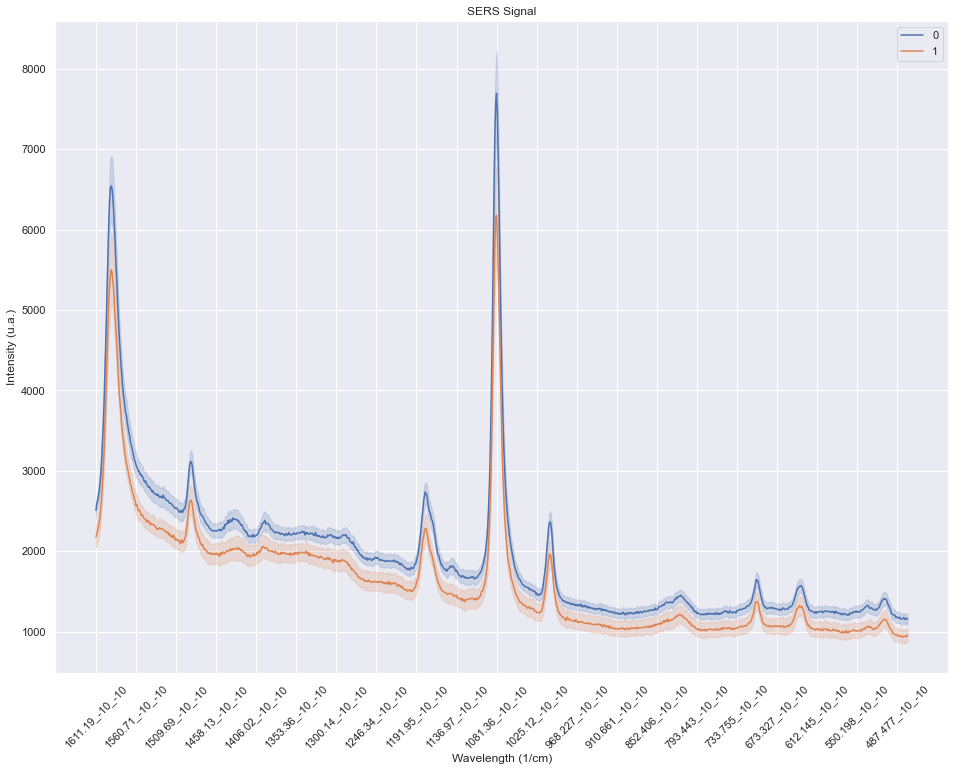

In [12]:
plotSersSignal(waveWithInterfering)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

def splitData(df, featureList, target):
    x = df.drop(featureList, axis = 1)
    y = target

    return x, y

def createEstimatorScoreDF(x, estimatorScore, sortedIdx):
    estimatorScoreDF = pd.DataFrame(estimatorScore[sortedIdx[::-1]], index=x.columns[sortedIdx[::-1]], columns=['score'])
    return estimatorScoreDF

def plotEstimatorScore(x, sortedIdx, estimatorScore, title):
    fig, ax = plt.subplots(1,1, figsize = (30, 15))
    sns.barplot(x = x.columns[sortedIdx], y = estimatorScore[sortedIdx])
    ax.set(xlabel = 'Feature', ylabel = 'Score', title = title)
    plt.xticks(rotation = 70, fontsize = 10)
    sns.despine(left=True, bottom=True)
    plt.show()

def estimatorScore(x, y, title):
    estimatorScore = mutual_info_classif(x, y, random_state = 42)
    sortedIdx = np.argsort(estimatorScore)

    estimatorScoreDF = createEstimatorScoreDF(x, estimatorScore, sortedIdx)

    plotEstimatorScore(x, sortedIdx, estimatorScore, title)

    return estimatorScoreDF

def selectKBestFeatures(k, estimatorScore, df):
    k_best = k
    k_best_features = estimatorScore.iloc[:k_best, :].index
    k_best_df = df[k_best_features]
    return k_best_df


nWaves = 441
nFeatures = 50

#estimator_scores_df = {}
X_sensor, y_sensor = splitData(raw_data, ['target'], raw_data['target'])
estimator_scores_df = estimatorScore(X_sensor, y_sensor, 'best features')

#k_best_df = {}
k_best_df = selectKBestFeatures(nWaves * nFeatures, estimator_scores_df, raw_data)
k_best_df['target'] = raw_data['target']

plt.show()

"""
e se eu iterar em cada wave do dataset e pra cada wave eu seleciono as melhores features??
plotar todos os dados usando uma funcao do pandas e verificar se todos os sinais tem o mesmo comportamento.
se sim, da pra fazer as operações com apenas um sinal e generalizar pra todos.
"""

### Teste

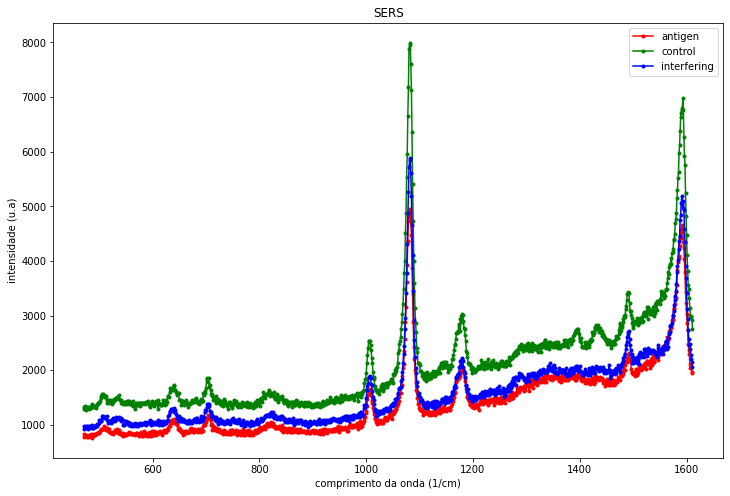

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
antigenSpec = antigen[:1014]
controlSpec = control[:1014]
interferingSpec = interfering[:1014]

#spec2 = data[1014:2028]
plt.plot(antigenSpec[2], antigenSpec[3], '.r-', label = 'antigen')
plt.plot(controlSpec[2], controlSpec[3], '.g-', label = 'control')
plt.plot(interferingSpec[2], interferingSpec[3], '.b-', label = 'interfering')

#ax = plt.plot(spec2[2], spec2[3], '.b-')
ax.set(xlabel = 'comprimento da onda (1/cm)',
       ylabel = 'intensidade (u.a)',
       title = 'SERS')

plt.legend()
plt.show()